# Problem 1 (Principal component analysis)

a) 因為他們一個人使用million，另一個使用billion，計算GDP的錢單位(尺度)不同，導致PCA計算結果的不同 <br>
b) 應該先對此組數據進行標準化(Standardization)，在進行後續的分析

# Problem 2 (Principal component analysis)

![title](a.jpeg)

![title](b.jpg)

![title](b_2.jpg)
α跟β的大小改變會影響eigenvalues(α,β上升，λ變大)<br>
但不會改變到eigenvectors

# Problem 3 (Principal component analysis)

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from numpy import linalg as la
import math

file = sio.loadmat("04HW2_noisy.mat", mdict=None, appendmat=True)


x = file['X']
E,sigma,F =la.svd(x)
Trans = x.T

a) The correct intrinsic dimensionality of the data is 10 

10 th


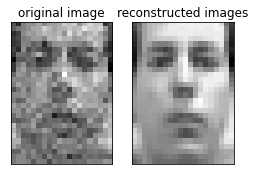

121 th


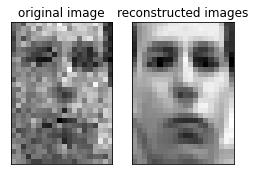

225 th


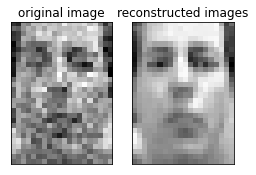

318 th


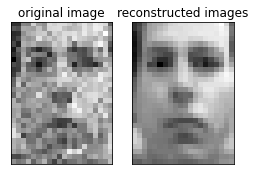

426 th


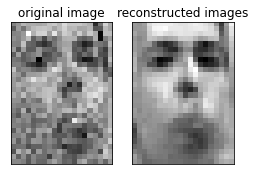

In [99]:
# (a)
print("a) The correct intrinsic dimensionality of the data is 10 \n")
S = np.zeros((560, 1965))
for i in range(560):
    S[i, i] = sigma[i]
S10 = S
S10[10::] = 0
x10 = E.dot(S10).dot(F)

show = [10, 121, 225, 318, 426]
for i in show:
    print(str(i),"th")
    plt.figure(figsize=(4,6))

    plt.subplot(121)
    plt.title("original image")
    plt.imshow(np.reshape(x[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.title("reconstructed images")
    plt.imshow(np.reshape(x10[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

b) The correct intrinsic dimensionality of the data is 2 

10 th


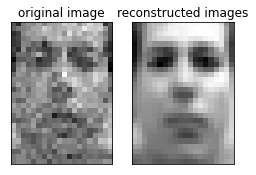

121 th


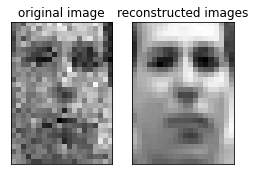

225 th


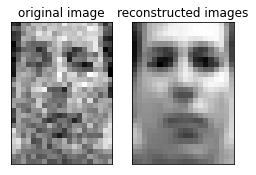

318 th


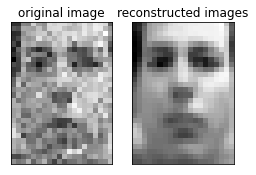

426 th


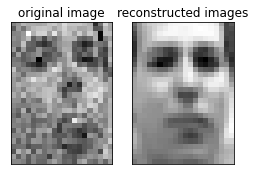

In [100]:
# (b)
print("b) The correct intrinsic dimensionality of the data is 2 \n")
S = np.zeros((560, 1965))
for i in range(560):
    S[i, i] = sigma[i]
S2 = S
S2[2::] = 0
x2 = E.dot(S2).dot(F)

for i in show:
    print(str(i),"th")
    plt.figure(figsize=(4,6))

    plt.subplot(121)
    plt.title("original image")
    plt.imshow(np.reshape(x[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.title("reconstructed images")
    plt.imshow(np.reshape(x2[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

The correct intrinsic dimensionality of the data is 30 

10 th


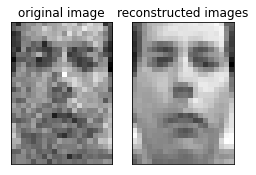

121 th


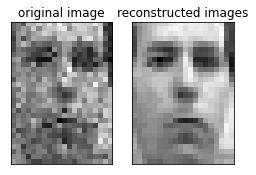

225 th


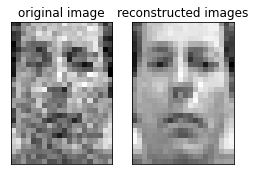

318 th


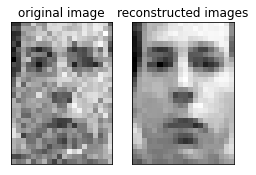

426 th


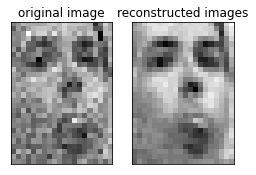

In [101]:
print("The correct intrinsic dimensionality of the data is 30 \n")
S = np.zeros((560, 1965))
for i in range(560):
    S[i, i] = sigma[i]
S30 = S
S30[30::] = 0
x30 = E.dot(S30).dot(F)

for i in show:
    print(str(i),"th")
    plt.figure(figsize=(4,6))

    plt.subplot(121)
    plt.title("original image")
    plt.imshow(np.reshape(x[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.title("reconstructed images")
    plt.imshow(np.reshape(x30[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

The correct intrinsic dimensionality of the data comparing 

10 th


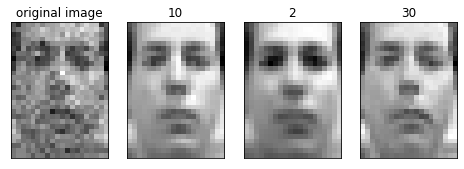

121 th


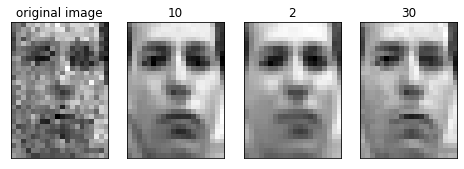

225 th


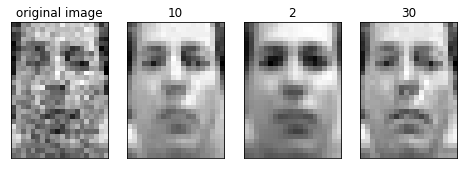

318 th


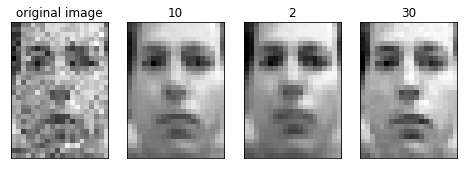

426 th


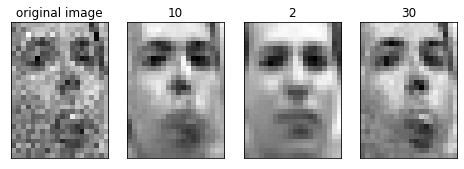

In [102]:
print("The correct intrinsic dimensionality of the data comparing \n")

for i in show:
    print(str(i),"th")
    plt.figure(figsize=(8,10))

    plt.subplot(141)
    plt.title("original image")
    plt.imshow(np.reshape(x[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(142)
    plt.title("10")
    plt.imshow(np.reshape(x10[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(143)
    plt.title("2")
    plt.imshow(np.reshape(x2[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(144)
    plt.title("30")
    plt.imshow(np.reshape(x30[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    plt.show()
    

c) choose: 18 cumulative percentage of variance: 71.37591685748004


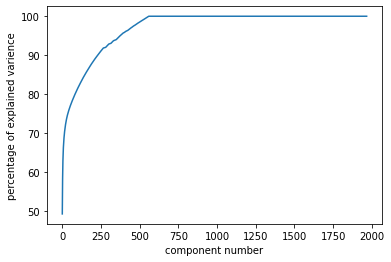

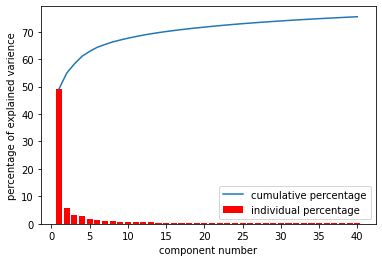

c) dim = 18
10 th


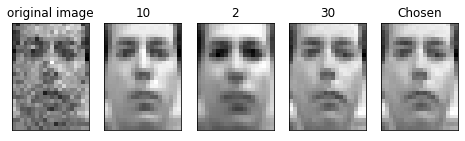

121 th


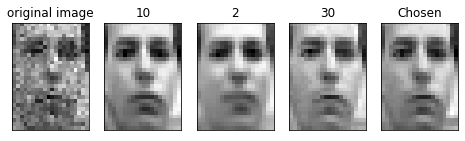

225 th


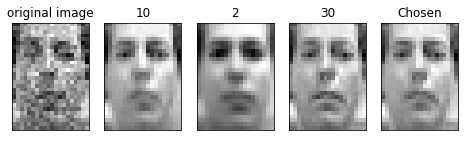

318 th


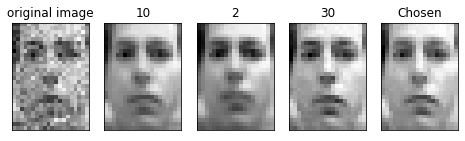

426 th


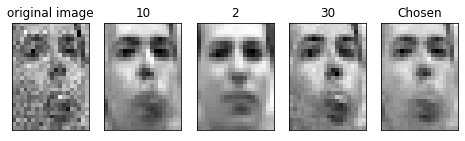

In [119]:
# (c)
covx = np.cov(Trans)
evals, evecs = np.linalg.eig(covx)
allvals = np.sum(evals)
percent = np.zeros(np.size(evals))
total = np.zeros(np.size(evals))
vals = np.zeros(np.size(evals))
j = 0
best = 0
for i in evals:
    percent[j] = np.real(i / allvals *100)
    total[j] = np.sum(percent)
    j += 1
    
    if total[j-1] >= 71:
        if best == 0:
            best = j   
            
    
print("c) choose: {}".format(best), "and its cumulative percentage of variance: {}".format(total[best]))     
plx = np.linspace(1, 1966, 1965)
plt.xlabel("component number")
plt.ylabel("percentage of explained varience")
plt.plot(plx, total, label="cumulative percentage")
plt.show()

plx = np.linspace(1, 1966, 1965)
plt.xlabel("component number")
plt.ylabel("percentage of explained varience")
plt.plot(plx[:40], total[:40], label="cumulative percentage")
plt.bar(plx[:40], percent[:40],align='center', color="red", label="individual percentage")
plt.legend()
plt.show()


S = np.zeros((560, 1965))
for i in range(560):
    S[i, i] = sigma[i]
Sbest = S
Sbest[best::] = 0
xbest = E.dot(Sbest).dot(F)
print("c) dim = {}".format(best))
for i in show:
    print(str(i),"th")
    plt.figure(figsize=(8,10))

    plt.subplot(151)
    plt.title("original image")
    plt.imshow(np.reshape(x[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(152)
    plt.title("10")
    plt.imshow(np.reshape(x10[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(153)
    plt.title("2")
    plt.imshow(np.reshape(x2[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(154)
    plt.title("30")
    plt.imshow(np.reshape(x30[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(155)
    plt.title("Chosen")
    plt.imshow(np.reshape(xbest[:,i], (28, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    plt.show()

透過計算在不同維數下eigenvalues所佔的全部比重，可發現累進比重約於71%後，累計explained variance上升趨勢趨緩許多，故選擇累計Variance大於71%時之維度18，並選擇前18個eigenvalues，佔原影像比重占71％以上，足夠表現圖片特徵，又不會產生過多噪點。